In [2]:
# If gspx is not installed, we add it to the path
import os, sys
gdir = os.path.dirname(os.getcwd())  # parent folder
sys.path.insert(0, gdir)

In [4]:
from gspx.utils.display import plot_graph
from gspx.qgsp import QMatrix
from gspx.utils.quaternion_matrix import explode_quaternions, implode_quaternions
import numpy as np

coords = np.array([
    [0, 1],
    [-1, 0],
    [0, -1],
    [1, 0],
    [0, 0],
])

M = np.zeros((5, 5, 4))

idx = np.array([
    [0, 4],
    [1, 4],
    [2, 4],
    [3, 4],
    [3, 0]
])

In [19]:
Aq = QMatrix.from_matrix(implode_quaternions(M))

In [20]:
from pyquaternion import Quaternion
from tqdm import tqdm

Ne = 5

rnd = np.random.RandomState(seed=42)
entries = rnd.randint(10, size=(Ne, 4))

for n, i in enumerate(idx):
    Aq.matrix[i[0], i[1]] = Quaternion(entries[n])

Aq = Aq + Aq.conjugate().transpose()

eigq, Vq = Aq.eigendecompose(hermitian_gso=True)

In [21]:
for row in Aq.matrix:
    print([str(q) for q in row])

['0.000 +0.000i +0.000j +0.000k', '0.000 +0.000i +0.000j +0.000k', '0.000 +0.000i +0.000j +0.000k', '1.000 -7.000i -5.000j -1.000k', '6.000 +3.000i +7.000j +4.000k']
['0.000 +0.000i +0.000j +0.000k', '0.000 +0.000i +0.000j +0.000k', '0.000 +0.000i +0.000j +0.000k', '0.000 +0.000i +0.000j +0.000k', '6.000 +9.000i +2.000j +6.000k']
['0.000 +0.000i +0.000j +0.000k', '0.000 +0.000i +0.000j +0.000k', '0.000 +0.000i +0.000j +0.000k', '0.000 +0.000i +0.000j +0.000k', '7.000 +4.000i +3.000j +7.000k']
['1.000 +7.000i +5.000j +1.000k', '0.000 +0.000i +0.000j +0.000k', '0.000 +0.000i +0.000j +0.000k', '0.000 +0.000i +0.000j +0.000k', '7.000 +2.000i +5.000j +4.000k']
['6.000 -3.000i -7.000j -4.000k', '6.000 -9.000i -2.000j -6.000k', '7.000 -4.000i -3.000j -7.000k', '7.000 -2.000i -5.000j -4.000k', '0.000 +0.000i +0.000j +0.000k']


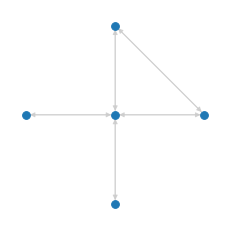

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

A_ = Aq.abs()
xi, yi = np.where(A_)
edgelist = [
    (xi[n], yi[n], {'weight': A_[xi[n], yi[n]]})
    for n in range(len(xi))
]

g = nx.DiGraph()

g.add_edges_from(edgelist)
plot_graph(
    g, coords, figsize=(3, 3), node_size=60,
    edge_color=(0.8, 0.8, 0.8, 0.8))
fig = plt.gcf()
plt.savefig('./degenerate_qgft_graph.pdf', dpi=300)

In [27]:
from gspx.utils.quaternion_matrix import explode_quaternions, implode_quaternions
arr = explode_quaternions(Vq.matrix)
arrq = implode_quaternions(np.round(arr, decimals=2))

In [28]:
for row in arrq:
    print([str(q) for q in row[:3]])

['-0.240 +0.000i -0.270j +0.160k', '0.590 +0.000i -0.020j +0.040k', '0.000 +0.000i +0.000j +0.000k']
['-0.170 -0.190i -0.220j +0.170k', '-0.310 +0.130i +0.090j +0.160k', '-0.410 +0.240i +0.390j -0.230k']
['-0.250 -0.120i -0.110j +0.130k', '-0.210 +0.140i +0.200j +0.090k', '0.190 -0.400i -0.480j +0.370k']
['-0.260 +0.010i +0.040j +0.250k', '-0.250 -0.480i -0.250j -0.060k', '0.000 +0.000i +0.000j +0.000k']
['0.310 +0.180i -0.250j -0.520k', '-0.020 -0.150i -0.070j -0.090k', '0.000 +0.000i +0.000j +0.000k']


In [29]:
for row in arrq:
    print([str(q) for q in row[3:]])

['-0.020 +0.000i -0.520j -0.280k', '-0.040 +0.000i +0.380j +0.030k']
['-0.050 +0.010i -0.120j +0.350k', '-0.010 +0.050i +0.200j +0.310k']
['-0.100 -0.040i +0.010j +0.310k', '0.010 -0.050i +0.260j +0.210k']
['0.360 -0.130i +0.300j -0.360k', '-0.110 -0.030i +0.270j +0.210k']
['0.070 -0.040i +0.100j +0.140k', '0.380 +0.140i +0.550j +0.040k']


In [31]:
M = QMatrix.from_matrix(arrq)
M * M.transpose().conjugate()

Quaternion-valued array of shape (5, 5):
[[Quaternion(1.0023, 1.1443623826323801e-17, 4.679590048795035e-18, -3.555142291666868e-18)
  Quaternion(0.00020000000000002343, 0.001200000000000017, 0.0005000000000000178, 0.002400000000000003)
  Quaternion(0.0009000000000000166, -0.0004999999999999758, -0.0023999999999999907, 0.004000000000000014)
  Quaternion(-0.0023999999999999894, 0.0015999999999999927, 0.0022000000000000123, 0.0039999999999999845)
  Quaternion(-0.001700000000000007, -0.00240000000000002, -0.008199999999999989, 0.0016999999999999932)]
 [Quaternion(0.00020000000000002343, -0.0012000000000000218, -0.0005000000000000165, -0.0024000000000000033)
  Quaternion(0.9978999999999999, -1.0436096431476472e-17, -6.0645932720149176e-18, 1.9364371217633903e-17)
  Quaternion(0.007499999999999943, 0.0010000000000000258, -0.0013000000000000017, 0.0005999999999999466)
  Quaternion(-0.0035999999999999583, -0.00819999999999999, -0.001999999999999998, 0.0034999999999999875)
  Quaternion(0.00440

In [33]:
np.round((Vq * Vq.conjugate().transpose()).abs(), decimals=5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [46]:
np.linalg.det(Vq.complex_adjoint)

(0.9999999999999992+1.1102230246251559e-16j)

In [13]:
print(Aq)

Quaternion-valued array of shape (5, 5):
[[Quaternion(0.0, 0.0, 0.0, 0.0) Quaternion(0.0, 0.0, 0.0, 0.0)
  Quaternion(0.0, 0.0, 0.0, 0.0) Quaternion(1.0, -7.0, -5.0, -1.0)
  Quaternion(6.0, 3.0, 7.0, 4.0)]
 [Quaternion(0.0, 0.0, 0.0, 0.0) Quaternion(0.0, 0.0, 0.0, 0.0)
  Quaternion(0.0, 0.0, 0.0, 0.0) Quaternion(0.0, 0.0, 0.0, 0.0)
  Quaternion(6.0, 9.0, 2.0, 6.0)]
 [Quaternion(0.0, 0.0, 0.0, 0.0) Quaternion(0.0, 0.0, 0.0, 0.0)
  Quaternion(0.0, 0.0, 0.0, 0.0) Quaternion(0.0, 0.0, 0.0, 0.0)
  Quaternion(7.0, 4.0, 3.0, 7.0)]
 [Quaternion(1.0, 7.0, 5.0, 1.0) Quaternion(0.0, 0.0, 0.0, 0.0)
  Quaternion(0.0, 0.0, 0.0, 0.0) Quaternion(0.0, 0.0, 0.0, 0.0)
  Quaternion(7.0, 2.0, 5.0, 4.0)]
 [Quaternion(6.0, -3.0, -7.0, -4.0) Quaternion(6.0, -9.0, -2.0, -6.0)
  Quaternion(7.0, -4.0, -3.0, -7.0) Quaternion(7.0, -2.0, -5.0, -4.0)
  Quaternion(0.0, 0.0, 0.0, 0.0)]]


In [36]:
eigvals, V = np.linalg.eig(Aq.complex_adjoint)
np.sort(np.round(eigvals, decimals=10))

array([-22.83570384+0.j, -22.83570384+0.j,  -6.34920255+0.j,
        -6.34920255+0.j,   0.        +0.j,  -0.        +0.j,
         6.45799327+0.j,   6.45799327-0.j,  22.72691312-0.j,
        22.72691312-0.j])

Running eigendecomposition of the shift operator.
Sorting the frequencies based on Total Variation.


Normalizing each eigenvector by its L1-norm.: 100%|██████████| 5/5 [00:00<00:00, 1242.24it/s]


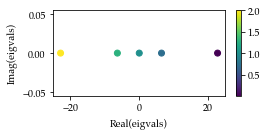

In [50]:
from gspx.qgsp import QGFT

qgft2 = QGFT(norm=1)
qgft2.fit(Aq)

plt.figure(figsize=(4, 2))
plt.scatter(np.real(qgft2.eigc), np.imag(qgft2.eigc), c=qgft2.tv_)
plt.colorbar()
# plt.title("Total Variation of eigenvectors for each eigenvalue")
plt.xlabel("Real(eigvals)")
plt.ylabel("Imag(eigvals)")
plt.tight_layout()
plt.savefig('./simple_example_tv.pdf', dpi=300)
plt.show()

In [51]:
qgft2.tv_

[2.0,
 1.2780383995763747,
 1.0000000000000002,
 0.7171975379820842,
 0.004764062441541475]

In [ ]:
array([2.        , 1.2780384 , 1.        , 0.71719754, 0.00476406])

In [45]:
Vq

Quaternion-valued array of shape (5, 5):
[[Quaternion(-0.2367479317301651, 0.0, -0.26684363531183425, 0.1605766589495396)
  Quaternion(0.5858357990499139, 0.0, -0.020242678340493144, 0.038509548914397625)
  Quaternion(2.5928064580839904e-16, 0.0, 4.906610206655482e-17, 1.1829888240531688e-17)
  Quaternion(-0.019620980810495993, 0.0, -0.5214495707277336, -0.2815900661282998)
  Quaternion(-0.03961964386960813, 0.0, 0.38468269192142945, 0.02693696710291007)]
 [Quaternion(-0.16658594006074323, -0.1885791278681831, -0.21622940114595582, 0.17063605722662298)
  Quaternion(-0.30636777121923114, 0.12542828975731923, 0.0913664410082279, 0.16062136666974536)
  Quaternion(-0.41355588079694683, 0.242358585929901, 0.39379349883199416, -0.23333718916557356)
  Quaternion(-0.0501932729906538, 0.012069001914165295, -0.11682271444465227, 0.3468187228638393)
  Quaternion(-0.014013159130666211, 0.04618914792445236, 0.20109958200322228, 0.3137233515246877)]
 [Quaternion(-0.2541964654356675, -0.1175903061779